In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# Directorios con los resultados del análisis (Cambiar si fuera necesario).
PatuT0F = '/Directorio/PatuT_rra_day0/results/test/'
PatuTCF = '/Directorio/PatuT_rra_control/results/test/'
PatuS0F = '/Directorio/PatuS_rra_day0/results/test/'
PatuSCF = '/Directorio/PatuS_rra_control/results/test/'

In [30]:
# Genes significativos obtenidos durante el análisis de MAGeCKFlute:
PatuTNeg = ['PRMT3', 'ASXL1', 'HELLS', 'SMARCE1', 'KDM4B', 'EPC2']
PatuTPos = ['WHSC1', 'SUV39H2']
PatuSNeg = ['BRD4', 'CHD7', 'ING5']
PatuSPos = ['PHF23', 'UBE2A']

In [31]:
# Carga de los archivos .gene_summary.txt de cada condición experimental para PatuT:

# Control Día 0:
PatuT0_7 = pd.read_csv(f'{PatuT0F}Day_7.gene_summary.txt', sep ='\t')
PatuT0_14 = pd.read_csv(f'{PatuT0F}Day_14.gene_summary.txt', sep ='\t')
PatuT0_21 = pd.read_csv(f'{PatuT0F}Day_21.gene_summary.txt', sep ='\t')
# Control sin Cas9:
PatuTC_7 = pd.read_csv(f'{PatuTCF}Day_7.gene_summary.txt', sep ='\t')
PatuTC_14 = pd.read_csv(f'{PatuTCF}Day_14.gene_summary.txt', sep ='\t')
PatuTC_21 = pd.read_csv(f'{PatuTCF}Day_21.gene_summary.txt', sep ='\t')

# Recopilación de todos los datos en una misma variable.
PatuTFull = {'PatuT_0_Day7': PatuT0_7, 'PatuT_0_Day14': PatuT0_14, 'PatuT_0_Day21': PatuT0_21, 'PatuT_Control_Day7': PatuTC_7, 'PatuT_Control_Day14': PatuTC_14, 'PatuT_Control_Day21': PatuTC_21}

In [32]:
# Carga de los archivos .gene_summary.txt de cada condición experimental para PatuS:

# Control Día 0
PatuS0_7 = pd.read_csv(f'{PatuS0F}Day_7.gene_summary.txt', sep ='\t')
PatuS0_14 = pd.read_csv(f'{PatuS0F}Day_14.gene_summary.txt', sep ='\t')
PatuS0_21 = pd.read_csv(f'{PatuS0F}Day_21.gene_summary.txt', sep ='\t')

# Control sin Cas9:
PatuSC_7 = pd.read_csv(f'{PatuSCF}Day_7.gene_summary.txt', sep ='\t')
PatuSC_14 = pd.read_csv(f'{PatuSCF}Day_14.gene_summary.txt', sep ='\t')
PatuSC_21 = pd.read_csv(f'{PatuSCF}Day_21.gene_summary.txt', sep ='\t')

# Recopilación de todos los datos en una misma variable.
PatuSFull = {'PatuS_0_Day7': PatuS0_7, 'PatuS_0_Day14': PatuS0_14, 'PatuS_0_Day21': PatuS0_21, 'PatuS_Control_Day7': PatuSC_7, 'PatuS_Control_Day14': PatuSC_14, 'PatuS_Control_Day21': PatuSC_21}

In [33]:
print(PatuT0_7)

         id  num  neg|score  neg|p-value   neg|fdr  neg|rank  neg|goodsgrna  \
0     KAT2A    4   0.001302     0.005075  0.912168         1              2   
1    HDAC10    4   0.002018     0.007720  0.912168         2              2   
2     PRMT3    4   0.002255     0.008535  0.912168         3              4   
3     CECR2    4   0.003903     0.014172  0.912168         4              3   
4     HELLS    4   0.004031     0.014659  0.912168         5              2   
..      ...  ...        ...          ...       ...       ...            ...   
391    FXR2    4   0.969870     0.970410  0.980310       392              0   
392   SETD6    2   0.976460     0.975650  0.983095       393              0   
393   JMJD6    4   0.986470     0.986990  0.991194       394              0   
394   CSTL1    4   0.988050     0.988690  0.991194       395              0   
395  TRIM33    3   0.999280     0.999350  0.999349       396              0   

     neg|lfc  pos|score  pos|p-value   pos|fdr  pos

In [34]:
print(PatuS0_7)

          id  num  neg|score  neg|p-value   neg|fdr  neg|rank  neg|goodsgrna  \
0    SMARCE1    4   0.001301     0.005075  0.936550         1              2   
1       MBD1    4   0.002966     0.010991  0.936550         2              3   
2       ING5    4   0.003456     0.012661  0.936550         3              2   
3      CECR2    4   0.003898     0.014162  0.936550         4              4   
4      KAT2A    4   0.006490     0.022792  0.936550         5              2   
..       ...  ...        ...          ...       ...       ...            ...   
391   SFMBT1    4   0.964210     0.964190  0.974033       392              0   
392    TDRD3    4   0.980890     0.981370  0.988865       393              0   
393    BAZ2A    4   0.988020     0.988660  0.993680       394              0   
394    SP140    4   0.992810     0.993140  0.995649       395              0   
395   TDRD10    4   0.999550     0.999600  0.999597       396              0   

      neg|lfc  pos|score  pos|p-value  

In [36]:
# Función que realiza los cálculos necesarios para la creación de un volcano plot dados unos datos de LogFC y de p-valor:
def VolDataGen(df, neg_genes, pos_genes, out):
    
    # En los archivos .gene__summary.txt, los LogFC tienen un p-valor para la selección positiva y uno para la selección negativa.
    # Filtrado de los p-valores de selección negativa para los LogFCs negativos.
    neg_df = df[df['neg|lfc'] < 0]
    neg_df = neg_df.rename(columns={'neg|lfc': 'lfc', 'neg|p-value': 'p-value'})

    # Filtrado de los p-valores de selección positiva para los LogFCs positivos.
    pos_df = df[df['pos|lfc'] >= 0]
    pos_df = pos_df.rename(columns={'pos|lfc': 'lfc', 'pos|p-value': 'p-value'})

    # Logaritmización del p-valor.
    neg_df['l10pvalue'] = -np.log10(neg_df['p-value'])
    pos_df['l10pvalue'] = -np.log10(pos_df['p-value'])

    # Concatenación de los LogFCs postivos y negativos con sus correspondientes p-valores.
    full_df = (pd.concat([neg_df, pos_df])).sort_index()

    # Generación del Vocano Plot:
    plt.scatter(full_df['lfc'], full_df['l10pvalue'], color='gray', alpha=0.3)

    sig_df = full_df[full_df['id'].isin(neg_genes + pos_genes)]

    for i, row in sig_df.iterrows():
        color = 'blue' if row['id'] in neg_genes else 'red'
        plt.scatter(row['lfc'], row['l10pvalue'], color=[color], alpha = 1)

        if row['id'] in neg_genes or row['id'] in pos_genes:
            plt.annotate(row['id'], (row['lfc'], row['l10pvalue']), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color=color)
    
    plt.xlabel('Log Fold Change')
    plt.ylabel('-log10(p-value)')
    plt.title(f'{out}_Volcano Plot')

    plt.savefig(f'{out}_Volcano Plot.png', format='png', dpi=300)
    plt.show()

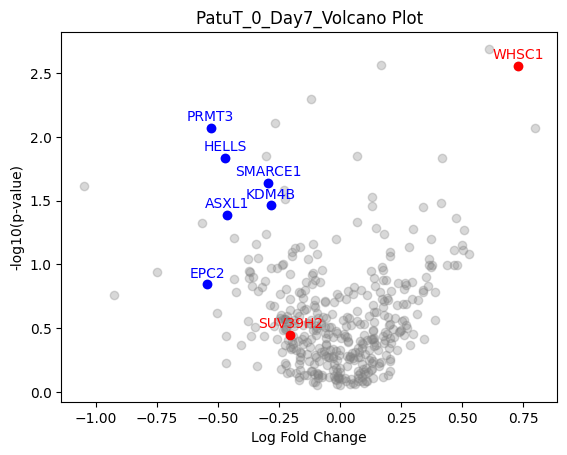

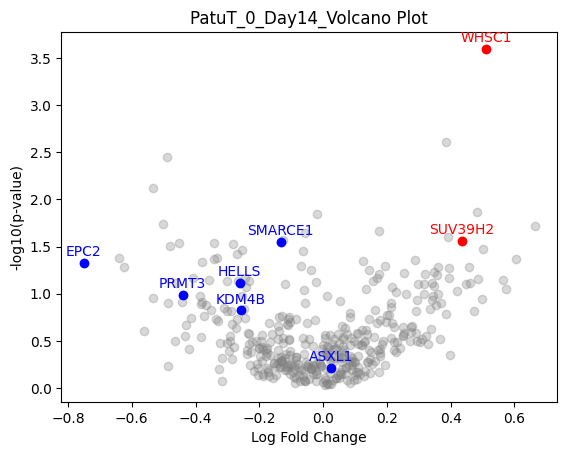

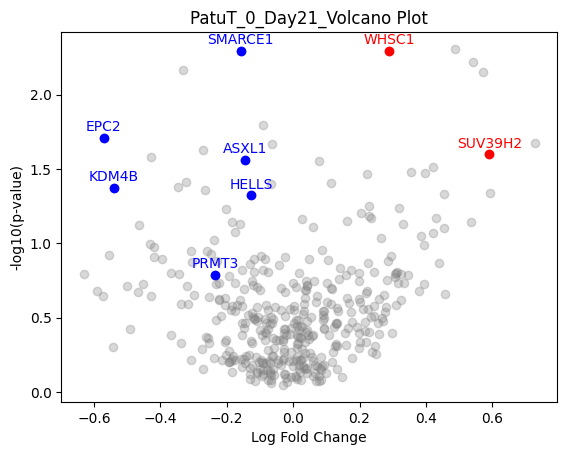

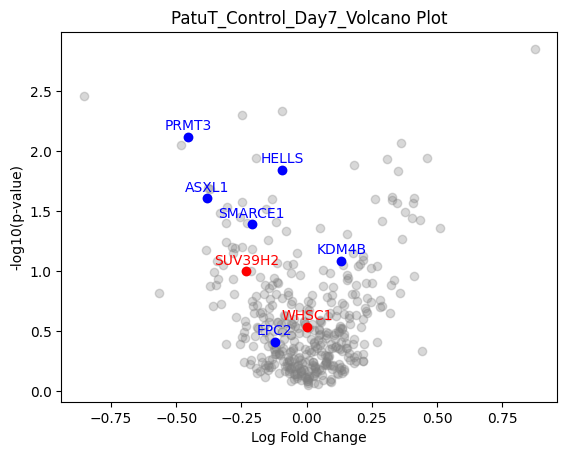

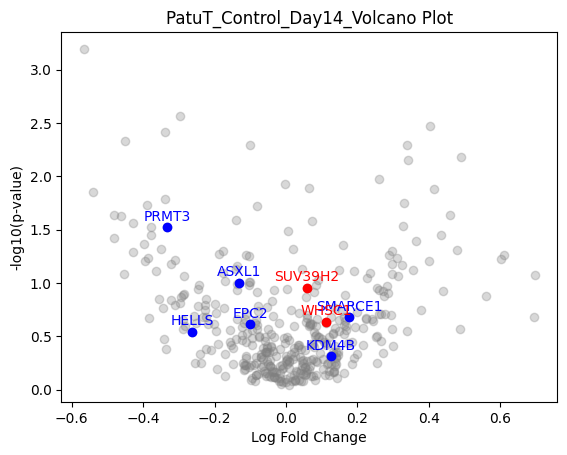

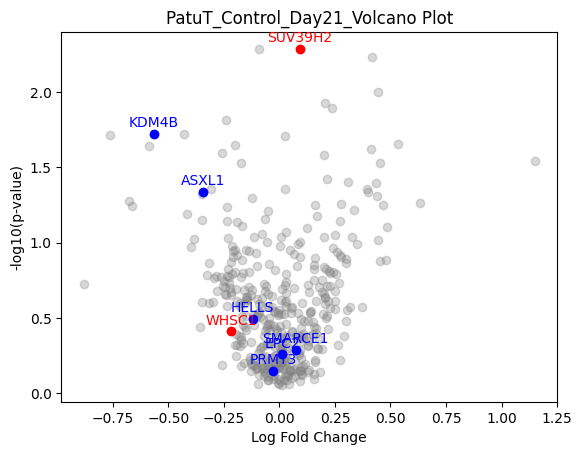

In [37]:
for df in PatuTFull:
    VolDataGen(PatuTFull[df], PatuTNeg, PatuTPos, df)

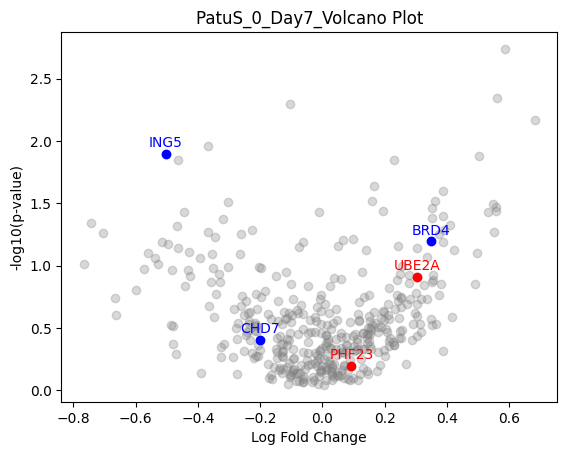

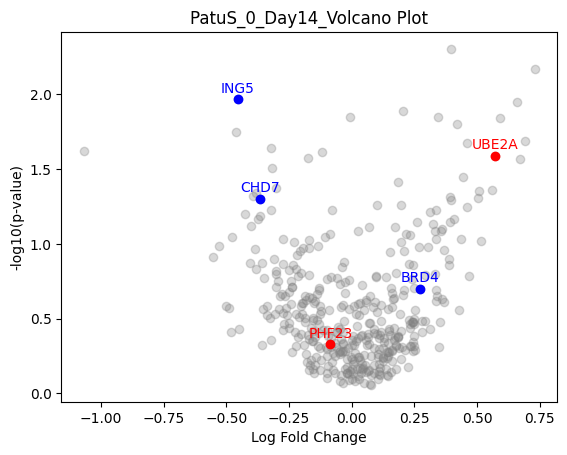

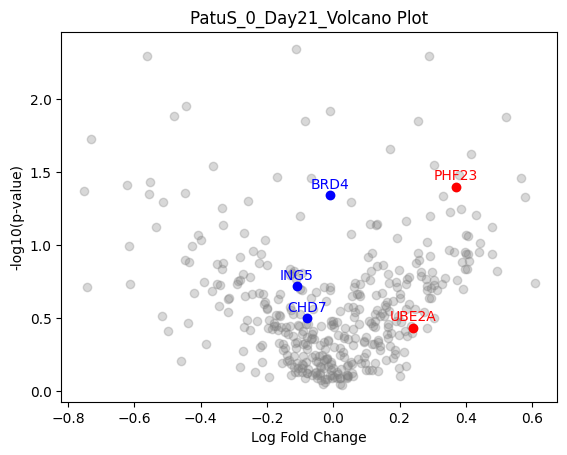

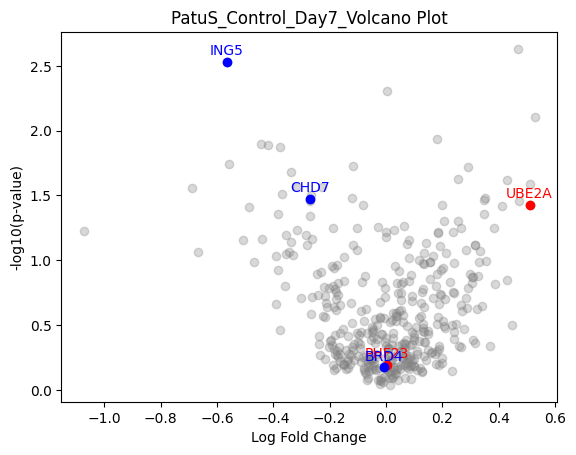

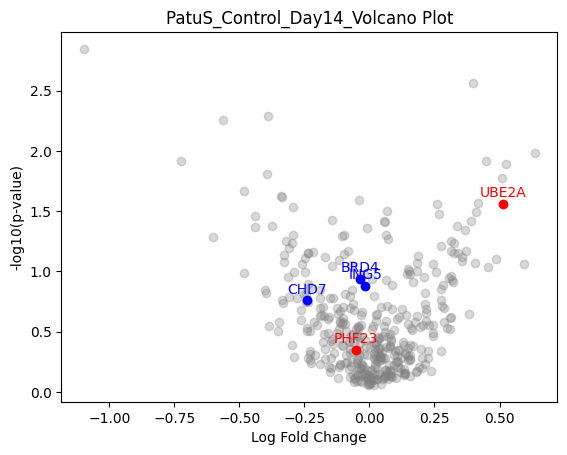

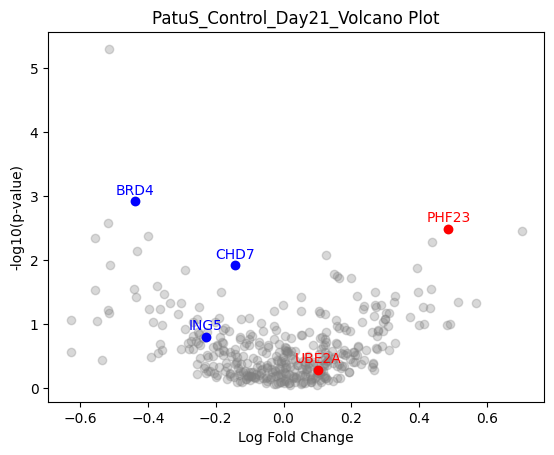

In [38]:
for df in PatuSFull:
    VolDataGen(PatuSFull[df], PatuSNeg, PatuSPos, df)